# Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')


from zipfile import ZipFile
file_name = '/content/drive/MyDrive/Dataset/masked_dataset.zip'

with ZipFile(file_name, 'r') as zip:
     zip.extractall()
print("Extraction completed succesfully...")



GDRIVEPATH = '/content/masked_dataset/'

Mounted at /content/drive
Extraction completed succesfully...


# Import Libraries 

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image
from keras import models
from keras import layers
from keras import optimizers
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.initializers import  RandomNormal
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.utils import to_categorical
from keras_preprocessing.image.utils import load_img
import glob
import cv2
from os import listdir

# Count Dataset Items

In [3]:
trainDir = GDRIVEPATH + 'train'
validationDir = GDRIVEPATH + 'validation'


#count training samples
trainingSamples = 0
for root_dir, cur_dir, files in os.walk(trainDir):
    trainingSamples += len(files)

#count validation samples
validationSamples = 0
for root_dir, cur_dir, files in os.walk(validationDir):
    validationSamples += len(files)


print("Number of Training Samples: ", trainingSamples)
print("Number of Validation Samples: ", validationSamples)

Number of Training Samples:  15531
Number of Validation Samples:  4953


# Data Analysis

Total for each emotion

In [4]:
#training data

totalTHappy = 0
for files in os.listdir(trainDir + '/happy'):
    if os.path.isfile(os.path.join(trainDir + '/happy', files)):
        totalTHappy += 1

totalTAngry = 0
for files in os.listdir(trainDir + '/angry'):
    if os.path.isfile(os.path.join(trainDir + '/angry', files)):
        totalTAngry += 1

totalTSad = 0
for files in os.listdir(trainDir + '/sad'):
    if os.path.isfile(os.path.join(trainDir + '/sad', files)):
        totalTSad += 1

totalTFear = 0
for files in os.listdir(trainDir + '/fear'):
    if os.path.isfile(os.path.join(trainDir + '/fear', files)):
        totalTFear += 1

totalTDisgust = 0
for files in os.listdir(trainDir + '/disgust'):
    if os.path.isfile(os.path.join(trainDir + '/disgust', files)):
        totalTDisgust += 1

totalTSurprise = 0
for files in os.listdir(trainDir + '/surprise'):
    if os.path.isfile(os.path.join(trainDir + '/surprise', files)):
        totalTSurprise += 1

totalTNeutral = 0
for files in os.listdir(trainDir + '/neutral'):
    if os.path.isfile(os.path.join(trainDir + '/neutral', files)):
        totalTNeutral += 1

#validation data

totalVHappy = 0
for files in os.listdir(validationDir + '/happy'):
    if os.path.isfile(os.path.join(validationDir + '/happy', files)):
        totalVHappy += 1

totalVAngry = 0
for files in os.listdir(validationDir + '/angry'):
    if os.path.isfile(os.path.join(validationDir + '/angry', files)):
        totalVAngry += 1

totalVSad = 0
for files in os.listdir(validationDir + '/sad'):
    if os.path.isfile(os.path.join(validationDir + '/sad', files)):
        totalVSad += 1

totalVFear = 0
for files in os.listdir(validationDir + '/fear'):
    if os.path.isfile(os.path.join(validationDir + '/fear', files)):
        totalVFear += 1

totalVDisgust = 0
for files in os.listdir(validationDir + '/disgust'):
    if os.path.isfile(os.path.join(validationDir + '/disgust', files)):
        totalVDisgust += 1

totalVSurprise = 0
for files in os.listdir(validationDir + '/surprise'):
    if os.path.isfile(os.path.join(validationDir + '/surprise', files)):
        totalVSurprise += 1

totalVNeutral = 0
for files in os.listdir(validationDir + '/neutral'):
    if os.path.isfile(os.path.join(validationDir + '/neutral', files)):
        totalVNeutral += 1

trainArray = [totalTHappy, totalTDisgust, totalTSurprise, totalTFear, totalTNeutral, totalTSad, totalTAngry]
validationArray = [totalVHappy, totalVDisgust, totalVSurprise, totalVFear, totalVNeutral, totalVSad, totalVAngry]

Inspect Dataset

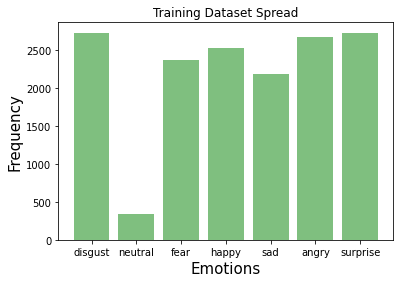

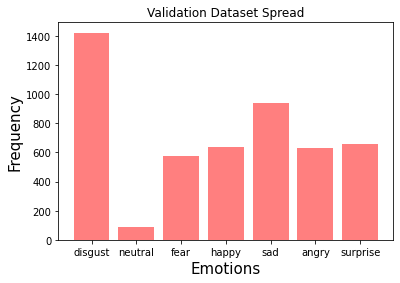

In [5]:
#training data
tlabels = os.listdir(trainDir) 

x = np.arange(len(tlabels))
tr_freq = trainArray
plt.bar(x, tr_freq, align='center', alpha=0.5, color="green")
plt.xticks(x, tlabels)
plt.xlabel('Emotions', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Training Dataset Spread')
plt.show()

#validation data
vlabels = os.listdir(validationDir)
    
x = np.arange(len(vlabels))
tr_freq = validationArray
plt.bar(x, tr_freq, align='center', alpha=0.5, color="red")
plt.xticks(x, vlabels)
plt.xlabel('Emotions', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Validation Dataset Spread')
plt.show()

Show Images

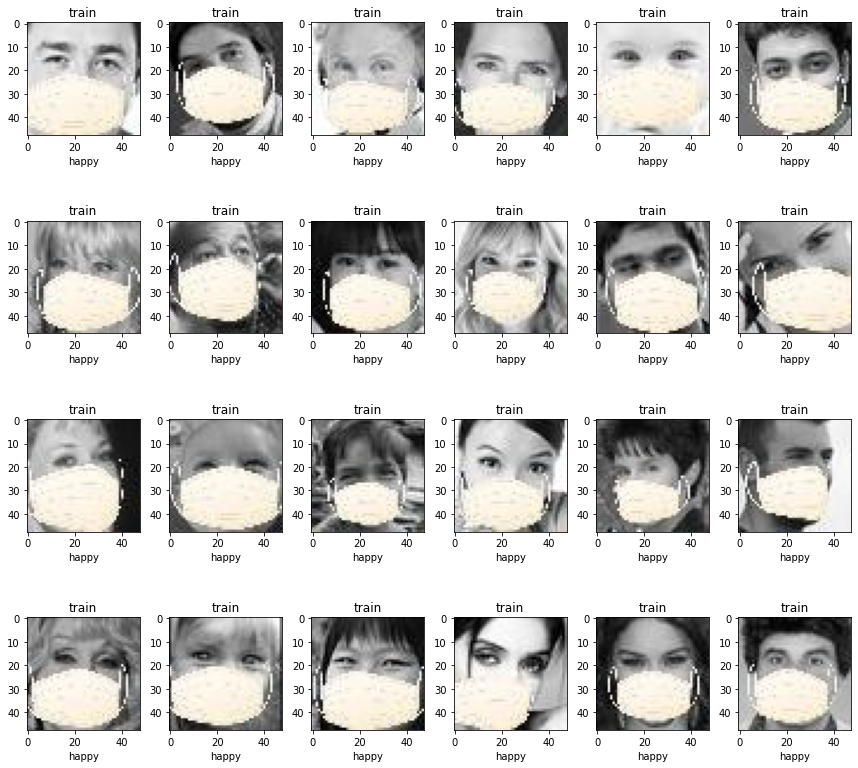

In [6]:

#type selection = training or validation
#emotion selection = happy, angry, fear, surprise, sad, neutral, disgust

typeSelection = 'train' #type selection
emotionSelection = 'happy' #emotion selection

tDir =  GDRIVEPATH + typeSelection + '/' + emotionSelection + '/*'
glob.glob(tDir)
images = [cv2.imread(image) for image in glob.glob(tDir)]
type(images)
len(images)
rows = 4
cols = 6
fig = plt.figure(figsize=(12,12))
for j in range(0, rows*cols):
    fig.add_subplot (rows, cols, j+1)
    plt.imshow(images[j])
    plt.title(typeSelection)
    plt.xlabel(emotionSelection)
    plt.tight_layout(True)

# Model

In [7]:
model = models.Sequential()

# 1st Layer

model.add(layers.Conv2D(32, kernel_size=(3, 3),  kernel_initializer='he_normal', input_shape=(48, 48, 1), activation='relu'))
model.add(layers.BatchNormalization())

# 2nd Layer

model.add(layers.Conv2D(64, kernel_size=(3, 3), kernel_initializer='he_normal', input_shape=(48, 48, 1), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# 3rd Layer

model.add(layers.Conv2D(128, kernel_size=(3, 3), kernel_initializer='he_normal', activation='relu'))
model.add(layers.BatchNormalization())

# 4th Layer

model.add(layers.Conv2D(256, kernel_size=(3, 3),  kernel_initializer='he_normal', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))

# 5th Layer

model.add(layers.Conv2D(512, kernel_size=(3, 3), kernel_initializer='he_normal', activation='relu'))
model.add(layers.BatchNormalization())

# 6th Layer

model.add(layers.Conv2D(1024, kernel_size=(3, 3),  kernel_initializer='he_normal', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())

# 7th Layer

model.add(layers.Dense(2048, kernel_initializer='he_normal', activation='relu'))
model.add(layers.BatchNormalization())

# 8th Layer

model.add(layers.Dense(1024, kernel_initializer='he_normal', activation='relu'))

#output layer

model.add(layers.Dense(7 ,kernel_initializer='he_normal', activation='softmax'))

# Model Overview

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 44, 44, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                        

# Callback funnctions

In [9]:
#callback function which saves the model with the highest accuracy after each epoch
saveBestModelatCheckpoint = ModelCheckpoint('BackupBestModel.h5', 
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1  #show output in training
)

#reduce learning rate when performance drops
reduceLearningRate = ReduceLROnPlateau(
    monitor = 'val_loss',
    factor=0.2,
    patience=4,
    verbose=1, #show output in training
    min_delta=0.0001
)

#stop training the model once it's performance stops improving
earlyStopping = EarlyStopping(
    monitor = 'val_loss',
    min_delta=0,
    patience=21,
    verbose=1, #show output in training
    restore_best_weights=True
)

callbacks = [saveBestModelatCheckpoint, reduceLearningRate, earlyStopping]

# Set Number of Epochs and Batch Size

In [10]:
ep = 1000 # number of epochs 
bs = 64 # batch size

# Data Augmentation

In [11]:
#init image data generator
trainingDataGen = ImageDataGenerator(
    #rescale = 1./255,
    rotation_range = 30, 
    horizontal_flip = True,
    fill_mode = 'nearest'
)
validationDataGen = ImageDataGenerator(
    #rescale = 1./255,
    rotation_range = 30, 
    horizontal_flip = True,
    fill_mode = 'nearest'
)

#training data generator
trainingDataGenerator = trainingDataGen.flow_from_directory(
GDRIVEPATH+'train',
target_size=(48,48),
color_mode = "grayscale",
class_mode = 'categorical'
)

#validation data generator
validationDataGenerator = validationDataGen.flow_from_directory(
GDRIVEPATH+'validation',
target_size=(48,48),
color_mode = "grayscale",
class_mode = 'categorical'
)


Found 15531 images belonging to 7 classes.
Found 4953 images belonging to 7 classes.


In [12]:
model.compile( optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['acc'])

# Train & show training

In [13]:
history = model.fit(
    trainingDataGenerator,
    steps_per_epoch= trainingSamples // bs,
    epochs = ep,
    callbacks = callbacks,
    validation_data = validationDataGenerator,
    validation_steps = validationSamples // bs
)


Epoch 1/1000
241/242 [============================>.] - ETA: 0s - loss: 2.1914 - acc: 0.2258
Epoch 1: val_loss improved from inf to 2.23655, saving model to BackupBestModel.h5
242/242 [==============================] - 25s 48ms/step - loss: 2.1910 - acc: 0.2256 - val_loss: 2.2365 - val_acc: 0.2362 - lr: 1.0000e-04
Epoch 2/1000
241/242 [============================>.] - ETA: 0s - loss: 1.9778 - acc: 0.2758
Epoch 2: val_loss did not improve from 2.23655
242/242 [==============================] - 10s 41ms/step - loss: 1.9793 - acc: 0.2752 - val_loss: 2.3097 - val_acc: 0.2411 - lr: 1.0000e-04
Epoch 3/1000
241/242 [============================>.] - ETA: 0s - loss: 1.9214 - acc: 0.2847
Epoch 3: val_loss improved from 2.23655 to 1.93556, saving model to BackupBestModel.h5
242/242 [==============================] - 10s 41ms/step - loss: 1.9209 - acc: 0.2849 - val_loss: 1.9356 - val_acc: 0.2731 - lr: 1.0000e-04
Epoch 4/1000
241/242 [============================>.] - ETA: 0s - loss: 1.8633 - acc

In [14]:
model.save('BestModel.h5')

# Model Performance Analysis

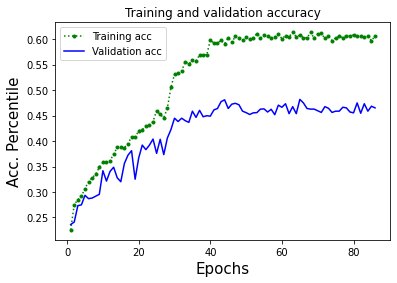

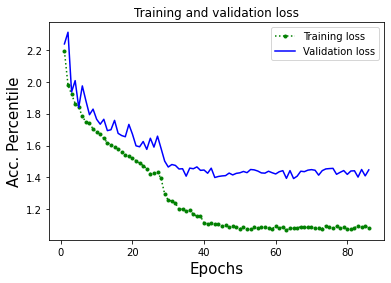

In [15]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'g:.', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Acc. Percentile', fontsize=15)
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g:.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Acc. Percentile', fontsize=15)
plt.legend()

plt.show()

In [16]:
trainingScore = model.evaluate(trainingDataGenerator)
print('Training loss:', trainingScore[0])
print('Training accuracy:', 100*trainingScore[1])
 
ValidationScore = model.evaluate(validationDataGenerator, verbose=1, batch_size=64)
print('Validation loss:', ValidationScore[0])
print('Validation accuracy:', 100*ValidationScore[1])

486/486 [==============================] - 12s 24ms/step - loss: 1.0513 - acc: 0.6186
Training loss: 1.0512592792510986
Training accuracy: 61.86336874961853
155/155 [==============================] - 4s 25ms/step - loss: 1.4317 - acc: 0.4583
Validation loss: 1.4316859245300293
Validation accuracy: 45.83081007003784


# Load the model with the best performance

In [17]:
model = models.load_model('BestModel.h5')

# Show image and plot prediction

In [18]:
def show_results(predictions, image):
    img = np.mat(image)
    plt.figure()
    plt.imshow(img, interpolation='none', cmap='gray')
    plt.figure()
    label = np.where(predictions[0] == np.amax(predictions[0]))
    x = np.arange(len(tlabels))
    plt.bar(x, predictions[0], align='center', alpha=0.5)
    plt.xticks(x, tlabels)
    plt.xlabel('Emotions', fontsize=15)
    plt.ylabel('Prediction', fontsize=15)
    plt.title("Predicted Emotion: "+tlabels[label[0][0]])
    plt.show()

In [19]:
def prediction(img):
  x = (img)
  x = np.expand_dims(x, axis=0)
  pred = model.predict(x)
  show_results(pred, x)

# Load images

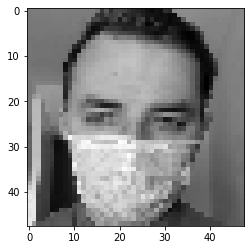

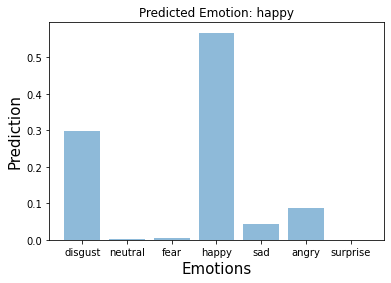

In [23]:
emotions = np.array(tlabels)
img1 = image.load_img('/content/happyme.jpg', color_mode="grayscale", target_size=(48,48))
prediction(img1)